In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier

In [3]:
iris = load_iris()

# Use only first two features for decision boundary visualization
X = iris.data[:, :2]  # sepal length, sepal width
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [4]:
base_tree = DecisionTreeClassifier(max_depth=1, random_state=42)

# AdaBoost model
ada = AdaBoostClassifier(
    estimator=base_tree,
    n_estimators=20,
    learning_rate=1.0,
    random_state=42
)


In [5]:
ada.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   n_estimators=20, random_state=42)

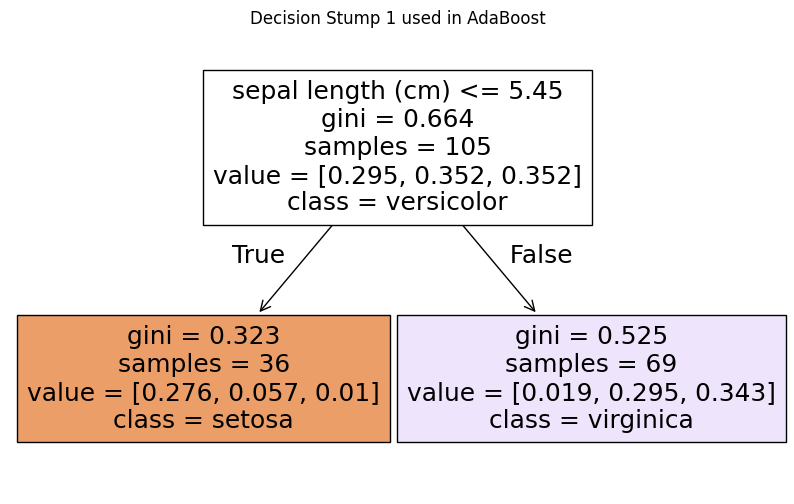

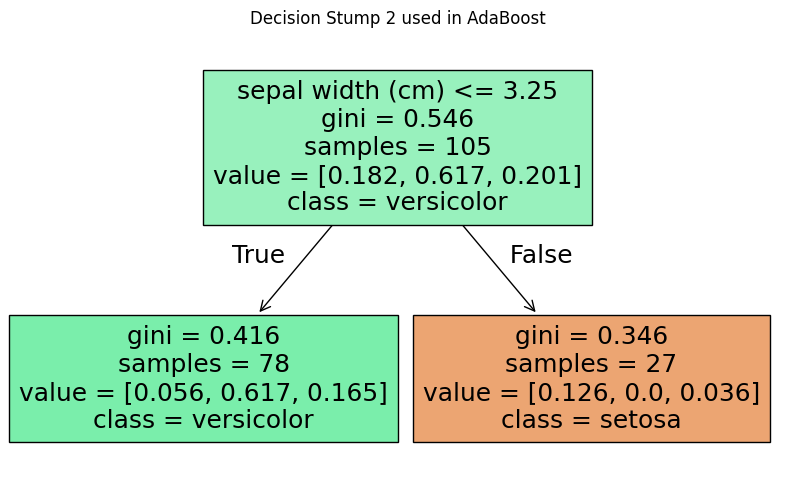

In [8]:
N = 2

for i in range(N):
    plt.figure(figsize=(10, 6))
    plot_tree(
        ada.estimators_[i],
        feature_names=iris.feature_names[:2],
        class_names=iris.target_names,
        filled=True
    )
    plt.title(f"Decision Stump {i+1} used in AdaBoost")
    plt.show()


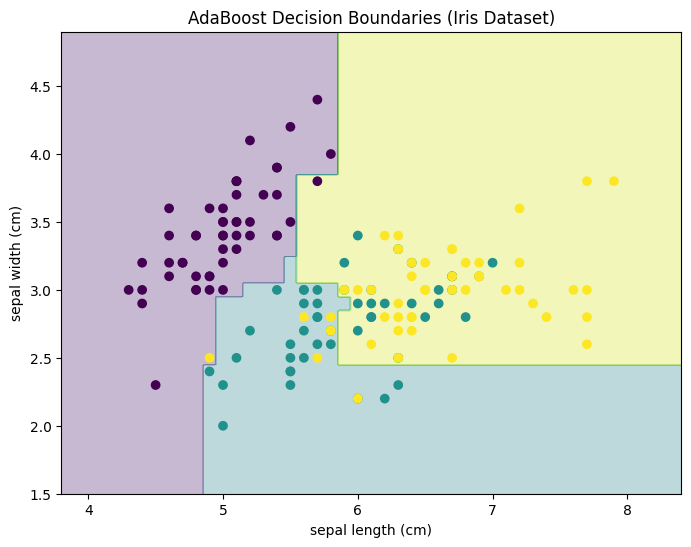

In [7]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("AdaBoost Decision Boundaries (Iris Dataset)")
plt.show()